In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Advection equation

Here we will explore the properties of different numerical methods for solving the linear advection equation:

$\frac{\partial f}{\partial t} = -c \frac{\partial f}{\partial x}$.

We will explore the Forward-in-time Centered-in-space (FTCS), Lax-Friedrichs (L-F) and Centered-in-time Centered-in-space (CTCS) methods that we covered in class.

The goals of this notebook are the following:
1. Learning to implement a numerical solver for an initial value PDE problem (particular the linear advection problem)
2. Learning to verify numerical convergence of your solutions.
2. Study the numerical properties of these methods and compare with numerical analysis techniques we introduced in class. E.g. Are they stable or unstable? How are my solutions distorted by the numerical method (due to numerical dispersion)?

### Forward-in-teim Centered-in-space (FTCS) method

We will start by focusing on the FTCS method.

a) Start by writing out the FTCS method (in the notebook) for the advection equation. Assume that your spatial domain is discretized into $x_j = j \Delta x$ with $j = 0, 1, 2, ..., M-1$, where $M$ is the number of grid points and  $\Delta x = L/M$, where L is the physical size of your domain. Consider periodic boundary conditions: $f(x_M) = f(x_0)$, equivalent to $f_M = f_0$. Time is discretized in steps of size $\Delta t$.


$f_j^{n+1} = f_j^{n} - c\frac{\Delta t}{2\Delta x} (f_{j+1}^{n}-f_{j-1}^{n})$ for $j = 1, 2, ..., M-2$

$f_0^{n+1} = f_0^{n} - c\frac{\Delta t}{2\Delta x} (f_{1}^{n}-f_{M-1}^{n})$ for left boundary ($j=0$)

$f_{M-1}^{n+1} = f_{M-1}^{n} - c\frac{\Delta t}{2\Delta x} (f_{0}^{n}-f_{M-2}^{n})$ for right boundary ($j=M-1$)

b) You will now implement an FTCS routine in python that updates $f(x_j, t_n) = f_j^n$ to value at the next time step $f(x_j, t_{n+1}) = f_j^{n+1}$. You will represent $f^n$ and $f^{n+1}$ as 1-d arrays of length $M$, containing the values of $f$ at each point $x_j = j\Delta x$, with $j=0, ..., M-1$. Write a routine that takes in as arguments the $f^{n}$ and $f^{n+1}$ arrays (the current and future $f$ arrays), the spatial and temporal steps ($\Delta x$ and $\Delta t$) and calculates $f^{n+1}$. Treat the interior points and boundary points separately. You can use the skeleton routine below as a starting point.

In [2]:
def FTCS_advection(f_np1, f_n, dx, dt):
    """
    This routine uses the FTCS method to calculate f_np1 (f at time n+1) given f_n (f at time n) 
    and spatial and temporal steps dx and dt.
    This method assumed periodic boundary conditions.
    The advection speed is set to c=1. 
    We assume here that space is measured in units of meters and time in seconds => c is in units of m/s).
    """
    
    c = 1
    M = len(f_np1)
    
    # update interior points
    for j in range(1, M-1):
        f_np1[j] = f_n[j] - c*dt/(2*dx) * (f_n[j+1]-f_n[j-1])

    # update boundary points assuming periodic boundary conditions
    f_np1[0] = f_n[0] - c*dt/(2*dx) * (f_n[1]-f_n[M-1])
    f_np1[M-1] = f_n[M-1] - c*dt/(2*dx) * (f_n[0]-f_n[M-2])

c) Now let's get ready to test the method. Let us choose a domain size L. Choose L = 10m. Initialize an array called $x$ (of size $M$), representing the discrete positions of your grid. Initialize $f_n$ and $f_{n+1}$ as 1-d arrays of size $M$ with all values set to zero.

In [3]:
L = 10 # physical size of the domain (in m)
M = 128 # number of spatial grid points

dx = L/M # spatial step size

x = np.arange(M)*dx # x-coordinates of grid points

# initializing f_n and f_np1 arrays and setting them to zero
f_n = np.zeros(M)
f_np1 = np.zeros(M)

d) We now need to define the initial condition $f(t=0,x) = f^0$. Initialize a gaussian initial condition (with peak amplitude 1). For instance, choose a gaussian pulse centered at $x_0 = 4$, and $\sigma = 0.5$. Plot the solution to verify that the gaussian is where you expect it to be -- Don't forget to add axes labels. 

Text(0, 0.5, '$f(x,t=0)$')

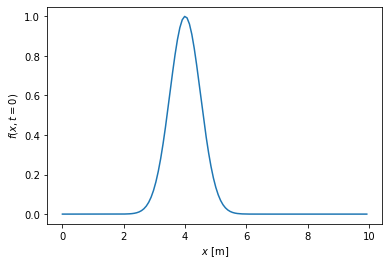

In [4]:
def gaussian_IC(x, x0, sigma):
    """
    Gaussian initial condition.
    """
    return np.exp(-(x-x0)**2 / (2*sigma**2))

f_0 = gaussian_IC(x=x, x0=4, sigma=0.5)

plt.plot(x, f_0)
plt.xlabel('$x$ [m]')
plt.ylabel('$f(x,t=0)$')

e) Examine the evolution of the solution as a function of time. Choose dt = 0.5*dx, and simulate for a total time T = 4. Does the solution look as you expect?

# Correct implementation

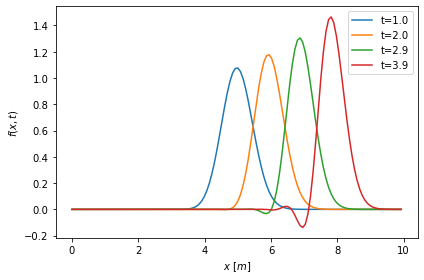

In [7]:
T = 4 # Physical time to simulate (in units of seconds)
dt = 0.5 * dx # Time step in units of seconds.

N = int(T/dt) # Total number of timesteps needed to reach t=T.

t = np.arange(N+1)*dt
f_n[:] = f_0

ndump = int(1/dt)

for n in range(1, N):
    FTCS_advection(f_np1, f_n, dx, dt) # advance one time step
    f_n = f_np1.copy() # Here we are copying the f_np1 values into f_n for next time step
    
    # if n is a multiple of ndump frequency, then plot
    if n%ndump ==0:
        plt.plot(x, f_n, label = 't='+str(round(n*dt,1)))

plt.xlabel('$x$ $[m]$')
plt.ylabel('$f(x,t)$')
plt.legend()
plt.tight_layout()

# Incorrect implementation

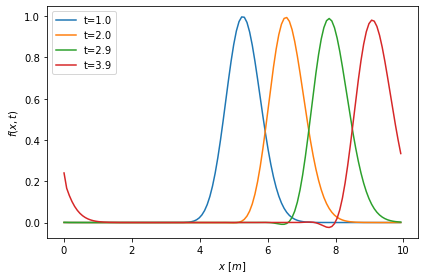

In [16]:
T = 4 # Physical time to simulate (in units of seconds)
dt = 0.5 * dx # Time step in units of seconds.

N = int(T/dt) # Total number of timesteps needed to reach t=T.

t = np.arange(N+1)*dt
f_n[:] = f_0

ndump = int(1/dt)

for n in range(1, N):
    FTCS_advection(f_np1, f_n, dx, dt) # advance one time step
    f_n = f_np1 # This operation does not give the right behavior. 
                # This assignment of f_np1 to f_n does not correspond to assigning the values of f_np1 to f_n.
                # It correspond to assigning the memory address of f_np1 to f_n. This means that if the values of f_np1 is updated, 
                # the values in f_n will also be updated.
    
    # if n is a multiple of ndump frequency, then plot
    if n%ndump ==0:
        plt.plot(x, f_n, label = 't='+str(round(n*dt,1)))

plt.xlabel('$x$ $[m]$')
plt.ylabel('$f(x,t)$')
plt.legend()
plt.tight_layout()

Here you you don't see the amplitude growth because of the incorrect implementation. You also see that the pulse is traveling faster than it should. The speed of the pulse is 1, meaning that after T = 4, the peak should have moved a distance of 4. So if the initial position of the pulse is at x = 4, the final position should be x= 8. You see above that the pulse has traveled faster than that. In the correct implmentation a couple of cells above, you see that the pulse has moved the right distance (to x = 8 at T=4).

Here is a stripped down version of the issue that was happening above with the variable assignments.

In [14]:
a = np.array([1,2,3,4]) # here we initiaze an array with some values

b = a # This assignment means that we are assigning to the variable b the memory reference of variable a

print(a,b) # We can print the variables to see what values they contain, and we see they contain the same values.

a[0] = 5 # Here we update an element of the array a. We change the value of the first element of a from 1 to 5.

print(a,b) # This change we made to the variable a is also reflected in variable b. This is because variable b is pointing to the same memory address as variable a.

[1 2 3 4] [1 2 3 4]
[5 2 3 4] [5 2 3 4]


The behavior above is not the behavior we want. We want to make changes to a variable a without making changes to variable b. Below is the correct way of achieving this behavior.

In [17]:
a = np.array([1,2,3,4]) # Again we initiaze an array a with some values
b = a.copy() # Now we assign a *copy of the values* of the array a to array b

print(a,b) # We can print the variables to see what values they contain, and we see they contain the same values.

a[0] = 5 # Now we update an element of the array a. We change the value of the first element of a from 1 to 5.

print(a,b) # This change is only reflected in array a. Array b was not changed!


[1 2 3 4] [1 2 3 4]
[5 2 3 4] [1 2 3 4]
